In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from IPython.display import display

In [2]:
data = pd.read_csv('KNN_Project_Data.csv')
data.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [4]:
missing_percentage = data.isnull().mean() * 100
missing_percentage

XVPM            0.0
GWYH            0.0
TRAT            0.0
TLLZ            0.0
IGGA            0.0
HYKR            0.0
EDFS            0.0
GUUB            0.0
MGJM            0.0
JHZC            0.0
TARGET CLASS    0.0
dtype: float64

In [5]:
data.describe()

XVPM         GWYH         TRAT         TLLZ         IGGA  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1055.071157   991.851567  1529.373525   495.107156   940.590072   
std     370.980193   392.278890   640.286092   142.789188   345.923136   
min      21.170000    21.720000    31.800000     8.450000    17.930000   
25%     767.413366   694.859326  1062.600806   401.788135   700.763295   
50%    1045.904805   978.355081  1522.507269   500.197421   939.348662   
75%    1326.065178  1275.528770  1991.128626   600.525709  1182.578166   
max    2117.000000  2172.000000  3180.000000   845.000000  1793.000000   

              HYKR         EDFS         GUUB         MGJM         JHZC  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1550.637455  1561.003252   561.346117  1089.067338  1452.521629   
std     493.491988   598.608517   247.357552   402.666953   568.132005   
min      27.930000    31.960000    13.520000    23.210000    30.890000   
25%    1219.267077  1132.097865   381.704293   801.849802  1059.499689   
50%    1564.996551  1565.882879   540.420379  1099.087954  1441.554053   
75%    1891.937040  1981.739411   725.762027  1369.923665  1864.405512   
max    2793.000000  3196.000000  1352.000000  2321.000000  3089.000000   

       TARGET CLASS  
count    1000.00000  
mean        0.50000  
std         0.50025  
min         0.00000  
25%         0.00000  
50%         0.50000  
75%         1.00000  
max         1.00000

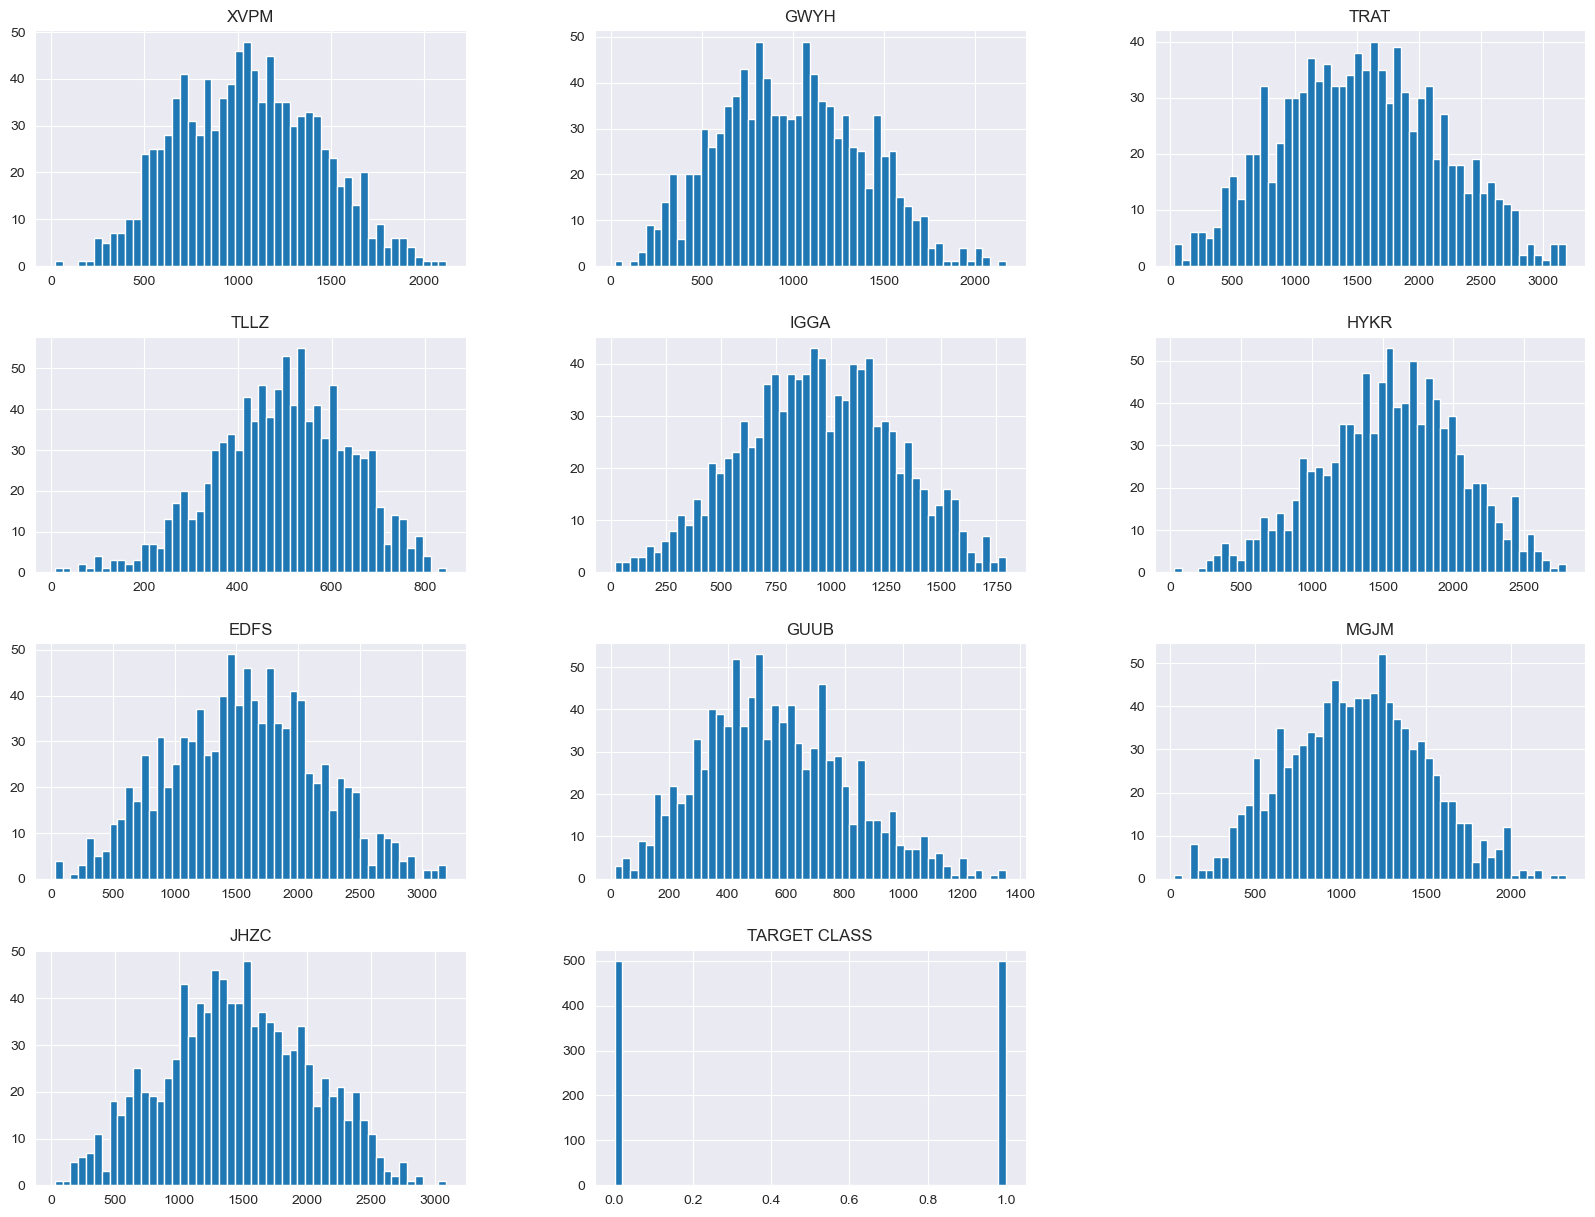

In [6]:
data.hist(bins=50, figsize=(20,15));

In [7]:
X=data.drop(columns="TARGET CLASS")
y=data["TARGET CLASS"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state=101)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [12]:
y_pred= model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[126  26]
 [ 24 124]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       152
           1       0.83      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {'C': [0.1,1,10], 
            'kernel': ['linear','rbf', 'sigmoid'],
            'gamma':['auto','scale'] }

In [17]:

grid = GridSearchCV(SVC(),param_grid, verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.850 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.843 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.850 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.807 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.850 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.829 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.829 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.850 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.814 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.829 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.850 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=auto, kernel=sigmoid;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=3)

In [18]:
grid.best_params_

{'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'}

In [19]:
model = SVC(C=0.1, gamma='auto', kernel='sigmoid')
model.fit(X_train, y_train)

SVC(C=0.1, gamma='auto', kernel='sigmoid')

In [20]:
y_pred=model.predict(X_test)

In [21]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[131  21]
 [ 28 120]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       152
           1       0.85      0.81      0.83       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



____

In [22]:
data= pd.read_csv('Churn_Modelling.csv')
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [23]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [24]:
data.shape

(10000, 14)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<Axes: xlabel='Age', ylabel='count'>

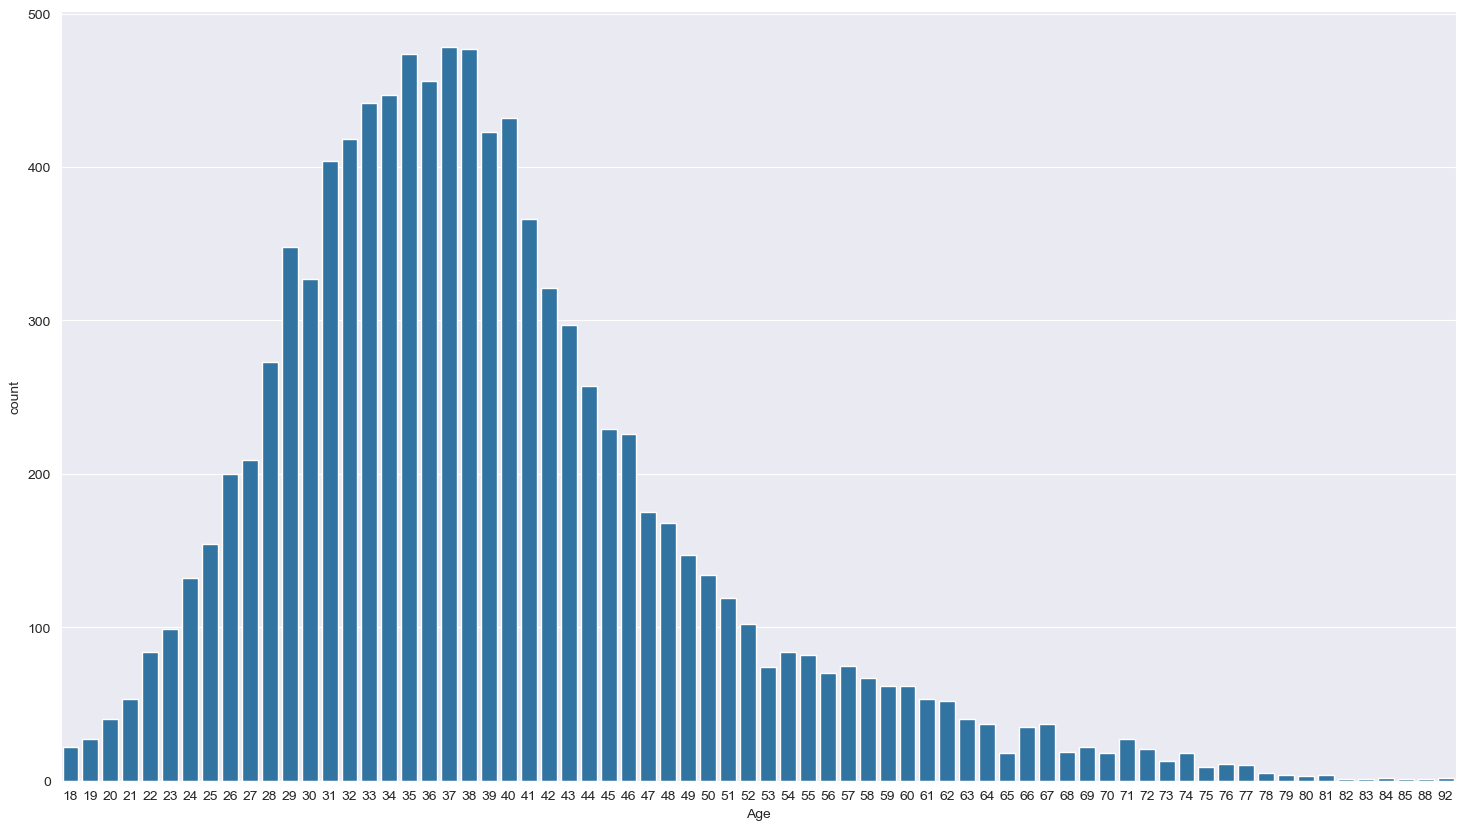

In [26]:
plt.figure(figsize=(18,10))
sns.countplot(x=data['Age'])

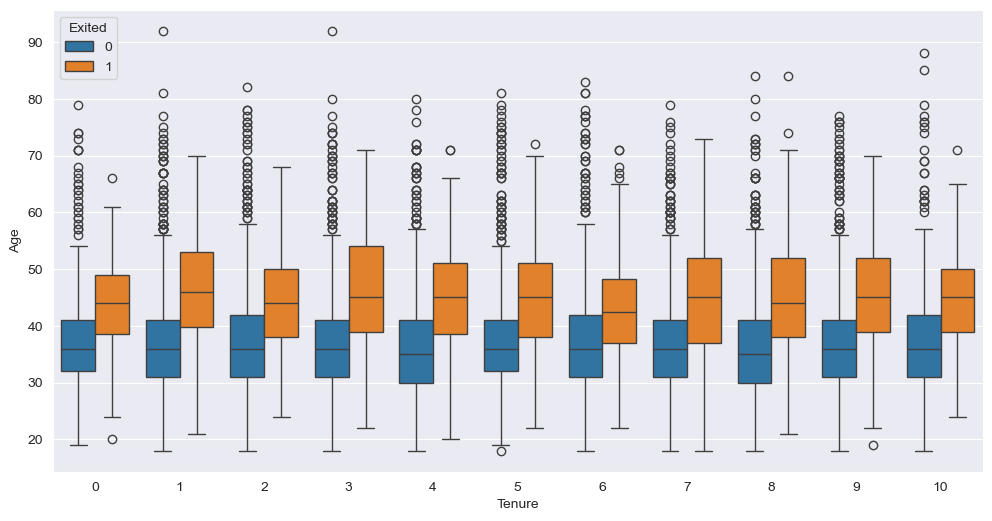

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data['Tenure'], y=data['Age'], hue=data['Exited']);

In [28]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [29]:
data.head(1)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       2      0.0              1          1               1        101348.88   

   Exited  
0       1

In [30]:
data = pd.get_dummies(data, columns=['Geography','Gender'], drop_first=True)
data.head()

RowNumber  CustomerId   Surname  CreditScore  Age  Tenure    Balance  \
0          1    15634602  Hargrave          619   42       2       0.00   
1          2    15647311      Hill          608   41       1   83807.86   
2          3    15619304      Onio          502   42       8  159660.80   
3          4    15701354      Boni          699   39       1       0.00   
4          5    15737888  Mitchell          850   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   Geography_Germany  Geography_Spain  Gender_Male  
0              False            False        False  
1              False             True        False  
2              False            False        False  
3              False            False        False  
4              False             True        False

In [31]:
data= data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1              False   
1               1        112542.58       0              False   
2               0        113931.57       1              False   
3               0         93826.63       0              False   
4               1         79084.10       0              False   

   Geography_Spain  Gender_Male  
0            False        False  
1             True        False  
2            False        False  
3            False        False  
4             True        False

In [32]:
X = data.drop(columns=['Exited'])
y = data['Exited']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state=101)


In [34]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [36]:
y_pred= model.predict(X_test)

In [37]:
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2327   51]
 [ 378  244]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2378
           1       0.83      0.39      0.53       622

    accuracy                           0.86      3000
   macro avg       0.84      0.69      0.72      3000
weighted avg       0.85      0.86      0.84      3000



In [38]:
param_grid = {'C': [0.1,1,10], 
            'kernel': ['linear','rbf', 'sigmoid'],
            'gamma':['auto','scale'] }
grid = GridSearchCV(SVC(),param_grid, verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.798 total time=   0.2s
[CV 2/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.798 total time=   0.3s
[CV 3/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.798 total time=   0.3s
[CV 4/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.798 total time=   0.3s
[CV 5/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.798 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.819 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.834 total time=   0.7s
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.824 total time=   0.7s
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.829 total time=   0.7s
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.819 total time=   0.7s
[CV 1/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.772 total time=   0.7s
[CV 2/5] END .C=0.1, gamma=auto, kernel=sigmoid;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=3)

In [39]:
model = SVC(C=1, gamma='auto')
model.fit(X_train, y_train)

SVC(C=1, gamma='auto')

In [40]:
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2327   51]
 [ 378  244]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2378
           1       0.83      0.39      0.53       622

    accuracy                           0.86      3000
   macro avg       0.84      0.69      0.72      3000
weighted avg       0.85      0.86      0.84      3000

